In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sns

In [30]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
#print first 10 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe(include=['O'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [31]:
label_encoder = preprocessing.LabelEncoder()

df['state'] = label_encoder.fit_transform (df ['state'])
df ['international plan'] = label_encoder.fit_transform (df ['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df ['churn'] = label_encoder.fit_transform (df ['churn'])
#too specific
df.drop(["phone number"], axis=1, inplace=True)

In [32]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [33]:
df.columns = ['state', 'account_length','area_code', 'international_plan','voice_mail_plan', 'number_vmail_messages','total_day_minutes', 'total_day_calls','total_day_charge', 'total_eve_minutes','total_eve_calls', 'total_eve_charge','total_night_minutes', 'total_night_calls','total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge','customer_service_calls', 'churn']

df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int32  
 4   voice_mail_plan         3333 non-null   int32  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [101]:
pd.Series(df["account_length"]).value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: account_length, Length: 212, dtype: int64

Text(0.5, 1.0, '(2850) 85.51% clients non-churn & (483) 14.49% clients churn')

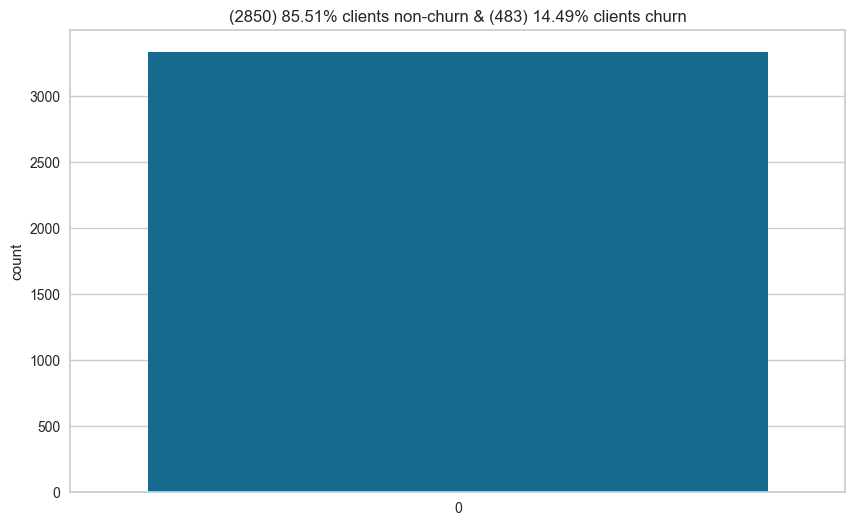

In [164]:
#Nombre de clients qui vont se désabonner
churn=df[df.churn == 1 ].count()[1]
#Nombre de clients qui vont pas se désabonner (retain)
stay=df[df.churn == 0 ].count() [1]
try:
    churn_percent= round((churn / (churn + stay) * 100),2)
except ZeroDivisionError:
        churn_percent=0
try:
    stay_percent = round((stay / (churn + stay) * 100),2)
except ZeroDivisionError:
    stay_percent=0
        
plt.figure(figsize=(10,6))
ax= sns.countplot(df['churn'])
ax.set_title(f'({stay}) {stay_percent}% clients non-churn & ({churn}) {churn_percent}% clients churn')

<AxesSubplot: >

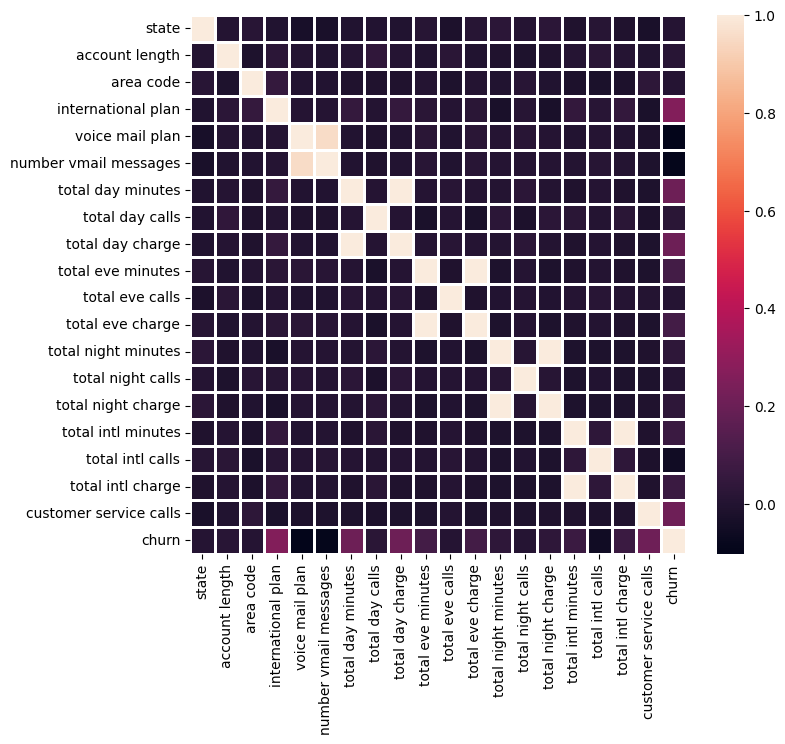

In [9]:
# calculate the correlation matrix
corr= df.corr()
#plot the heatmap
fig = plt.figure(figsize=(8, 7))
sns.heatmap (corr,
xticklabels=corr.columns,
yticklabels=corr.columns,
             linewidths=.75)

In [10]:
#we will normalize our data so the prediction on all features will be at the same scale
X = df.iloc[:,0:19].values
y= df.iloc[:,19].values
#nurmalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:19])
#add non-feature target column to dataframe
dfNorm['churn'] = df['churn']
dfNorm.head(10)
X = dfNorm.iloc[:, 0:19].values
y = dfNorm.iloc[:, 19].values

In [11]:
# after we learn and preprocessed our data, we need to split it n to train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
print (f'X_train: {X_train. shape}, y_train: {y_train.shape}')
print (f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (2333, 19), y_train: (2333,)
X_test: (1000, 19), y_test: (1000,)


In [14]:
pip install -U imblearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, sampling_strategy = 1.0)
X_train_res, y_train_res = sm.fit_resample (X_train, y_train)

In [16]:
import collections
collections.Counter(y_train)

Counter({0: 1988, 1: 345})

In [17]:
import collections
collections.Counter(y_train_res)

Counter({0: 1988, 1: 1988})

In [18]:
results_test = {}
results_train = {}
def prdict_date(algo_name, X_train, y_train,X_test,y_test, verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    results_test[str(algo_name)[0:str(algo_name).find('(')]] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]] = acc_train
    if verbose==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [19]:
### helping function
def conf(algo_name, X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test)
    sns.heatmap(forest_cm, annot=True, fmt='.2f', xticklabels = ["1", "0"], yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name) [0: str(algo_name).find('(')])

**Régression logistique**

acc train: 85.77
acc test: 86.6
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       862
           1       0.54      0.18      0.27       138

    accuracy                           0.87      1000
   macro avg       0.71      0.58      0.60      1000
weighted avg       0.83      0.87      0.84      1000



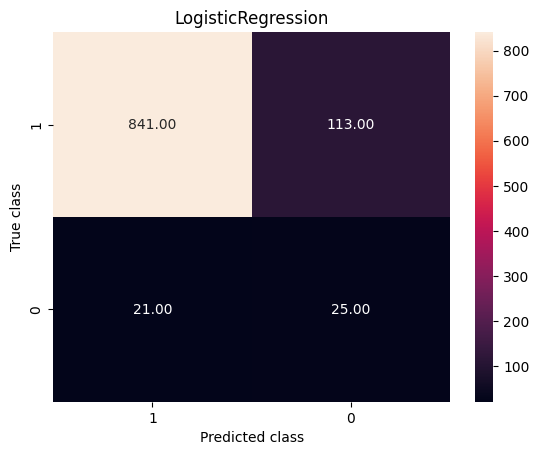

In [20]:
#Impot the module
from sklearn.linear_model import LogisticRegression
# Create a classify object
logr = LogisticRegression()
# Train et predict: Logistic Regression
prdict_date(logr,X_train, y_train, X_test, y_test)
#print the classification report
print(classification_report(y_test, logr.predict(X_test)))
#confusion matrice
conf(logr,X_test, y_test)

**XGBoostClassifiermodel**

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


[14:15:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "loss" } are not used.

acc train: 100.0
acc test: 95.0
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       862
           1       0.84      0.79      0.81       138

    accuracy                           0.95      1000
   macro avg       0.90      0.88      0.89      1000
weighted avg       0.95      0.95      0.95      1000



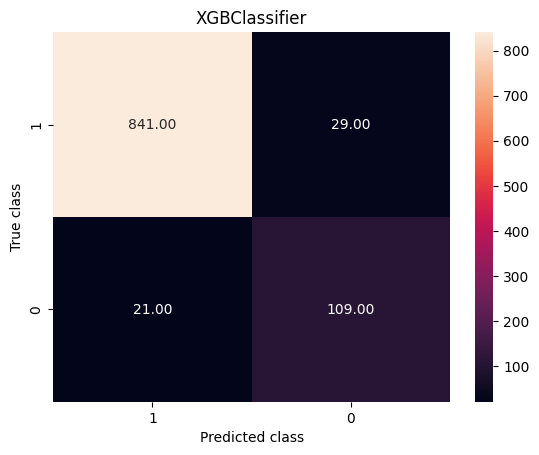

In [22]:
from xgboost import XGBClassifier
# Train: Gradient Boosting
gbc = XGBClassifier(loss='deviance', learning_rate=0.2, n_estimators=200, max_depth=6)
prdict_date(gbc,X_train_res,y_train_res,X_test,y_test)
print (classification_report(y_test, gbc.predict(X_test)))
conf (gbc,X_test, y_test)

**Forêtaléatoire**

acc train: 100.0
acc test: 93.5
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       862
           1       0.74      0.80      0.77       138

    accuracy                           0.94      1000
   macro avg       0.86      0.88      0.87      1000
weighted avg       0.94      0.94      0.94      1000



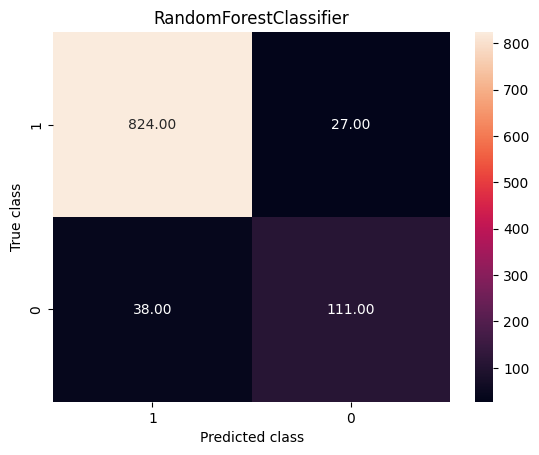

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier (n_estimators=75, random_state=0 )
prdict_date(random_forest,X_train_res,y_train_res,X_test,y_test)
print (classification_report (y_test, random_forest.predict(X_test)))
conf(random_forest,X_test, y_test)

**Machineàvecteurdesupport(SVM)**

##### SVMlinearkernel 

In [24]:
###### Linear svm:
#Import the model
from sklearn import svm
# SVM
###### Linear svm:
svm = svm. SVC (kernel="linear", probability=True)
prdict_date(svm,X_train_res,y_train_res,X_test, y_test)

acc train: 78.52
acc test: 75.0


##### SVMrbf(gaussien)kernel 

In [25]:
#Import the model
from sklearn import svm
###### linear rbf:
svm = svm.SVC (kernel='rbf', probability=True)
prdict_date(svm,X_train_res,y_train_res,X_test,y_test)

acc train: 94.11
acc test: 89.4


##### SVMpolykernel 

In [26]:
#Import the model
from sklearn import svm
###### poly svm:
# SVM
svm = svm.SVC (kernel='poly', probability=True)
prdict_date(svm,X_train_res,y_train_res,X_test,y_test)

acc train: 92.58
acc test: 89.6


acc train: 92.58
acc test: 89.6
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       862
           1       0.60      0.73      0.66       138

    accuracy                           0.90      1000
   macro avg       0.78      0.83      0.80      1000
weighted avg       0.91      0.90      0.90      1000



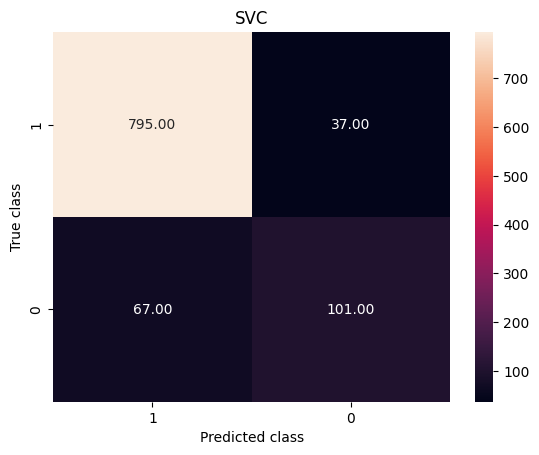

In [27]:
#Import the model
from sklearn import svm
# Train: SVM
svm = svm.SVC (kernel='poly', probability=True)
prdict_date(svm,
X_train_res,y_train_res,X_test,y_test)
print(classification_report (y_test, svm.predict(X_test)))
conf(svm, X_test, y_test)

**KNNClassifiermodel**

The optimal number of neighbors is 4 with 87.7% 


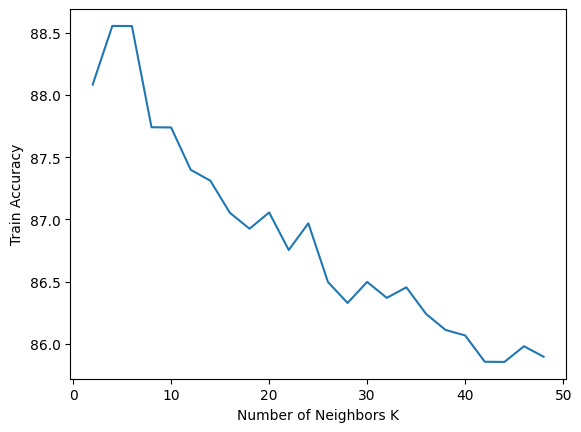

In [28]:
# we will try to find witch K is the best on our data
# first, we will look which give us the best predictions on the train:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
#Neighbors
neighbors = [x for x in list(range(1,50)) if x % 2 == 0]
#Create empty list that will hold cv scores
cv_scores = []
#Perform 10-fold cross validation on training set for odd values of k:
seed=0
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier (n_neighbors = k_value, weights = 'uniform', p=2, metric="euclidean")
    kfold = model_selection.KFold (n_splits=10, shuffle=True)
    scores = model_selection.cross_val_score (knn, X_train, y_train, cv = kfold, scoring="accuracy")
    cv_scores.append(scores.mean()*100)
    #print("kand 0.2 +/- 0.2f) (k_value, scores.neam()*100, scores.std()*100))
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(("The optimal number of neighbors is %d with %0.1f%% " % (optimal_k, cv_scores[optimal_k])))
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel("Train Accuracy")
plt.show()

The optimal number of neighbors is 4 with 87.8%


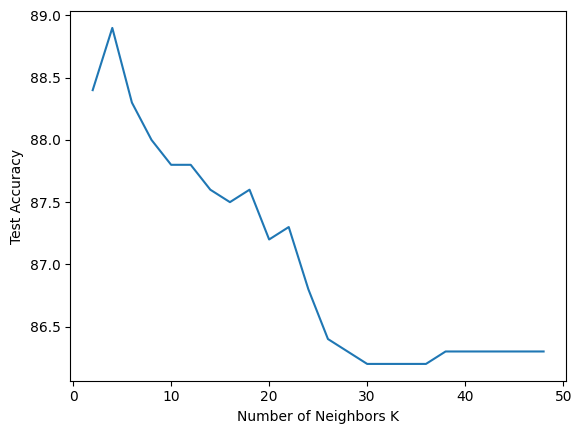

In [29]:
from sklearn.metrics import accuracy_score

#then on the test:
cv_preds = []
#Perform 18-fold cross validation on testing set for odd values of k
seed=0
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights="uniform", p=2, metric="euclidean")
    kfold = model_selection.KFold (n_splits=10, random_state=None)
    preds = model_selection.cross_val_predict(knn, X_test, y_test, cv=kfold)
    cv_preds.append(accuracy_score(y_test, preds) *100)
    #print("k-hd 0.2f"(k_value, 100 metrics.accuracy score (test_y, preds}}}
optimal_k = neighbors[cv_preds.index(max (cv_preds))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_preds[optimal_k]))

plt.plot(neighbors, cv_preds)
plt.xlabel("Number of Neighbors K")
plt.ylabel('Test Accuracy')
plt.show()

acc train: 96.3
acc test: 82.6
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       862
           1       0.42      0.70      0.53       138

    accuracy                           0.83      1000
   macro avg       0.68      0.77      0.71      1000
weighted avg       0.87      0.83      0.84      1000



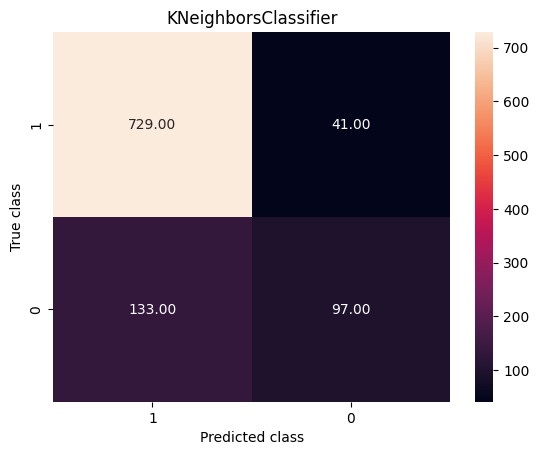

In [30]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 4)
prdict_date(knn,X_train_res,y_train_res,X_test,y_test)
print (classification_report (y_test, knn.predict(X_test)))
conf (knn,X_test, y_test)

**NaivesBayesClassifiermodel**

acc train: 79.93
acc test: 77.3
              precision    recall  f1-score   support

           0       0.95      0.78      0.85       862
           1       0.35      0.75      0.48       138

    accuracy                           0.77      1000
   macro avg       0.65      0.76      0.67      1000
weighted avg       0.87      0.77      0.80      1000



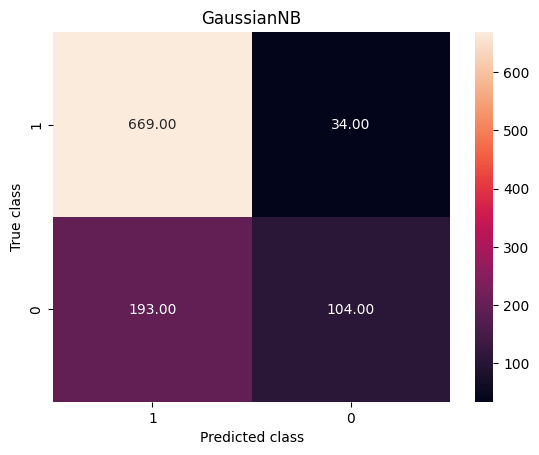

In [31]:
#Import the model
from sklearn.naive_bayes import GaussianNB
# Train: GuassianNB
nv = GaussianNB()
prdict_date(nv,X_train_res,y_train_res,X_test,y_test)
print(classification_report (y_test, nv.predict(X_test)))
conf (nv,X_test, y_test)

**Arbre de décision**

acc train: 100.0
acc test: 89.0
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       862
           1       0.58      0.77      0.66       138

    accuracy                           0.89      1000
   macro avg       0.77      0.84      0.80      1000
weighted avg       0.91      0.89      0.90      1000



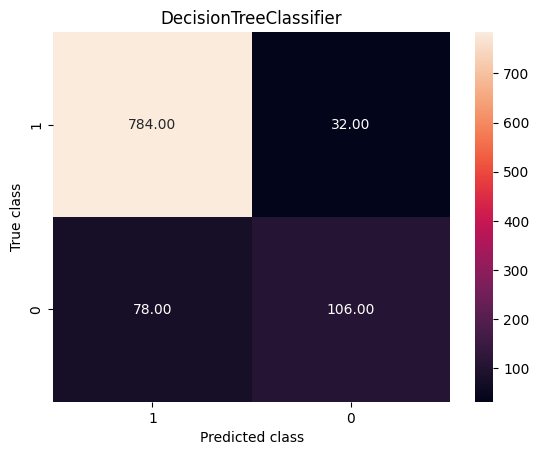

In [32]:
#Import the model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Train: GuassianNB
model = DecisionTreeClassifier()
prdict_date(model,X_train_res,y_train_res,X_test,y_test)
print(classification_report (y_test, model.predict(X_test)))
conf (model,X_test, y_test)

**Comparaison des résultats/input et output**

In [33]:
df_train = pd.DataFrame(list(results_train.items()), columns=['algo_name','acc_train'])
df_train

,algo_name,acc_train
0,LogisticRegression,85.77
1,XGBClassifier,100.00
2,RandomForestClassifier,100.00
3,SVC,92.58
4,KNeighborsClassifier,96.30
5,GaussianNB,79.93
6,DecisionTreeClassifier,100.00


In [34]:
df_test = pd.DataFrame(list(results_test.items()), columns=['algo_name','acc_test'])
df_test

,algo_name,acc_test
0,LogisticRegression,86.6
1,XGBClassifier,95.0
2,RandomForestClassifier,93.5
3,SVC,89.6
4,KNeighborsClassifier,82.6
5,GaussianNB,77.3
6,DecisionTreeClassifier,89.0


**COMPARAISON DES TRAIN ET DES TEST**

In [35]:
df_test =pd.DataFrame(list(results_test.items()),
columns=['algo_name', 'acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
columns=['algo_name', 'acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test', ascending = False)

,algo_name,acc_test,acc_train
1,XGBClassifier,95.0,100.00
2,RandomForestClassifier,93.5,100.00
3,SVC,89.6,92.58
6,DecisionTreeClassifier,89.0,100.00
0,LogisticRegression,86.6,85.77
4,KNeighborsClassifier,82.6,96.30
5,GaussianNB,77.3,79.93


**Meilleur algorithme**

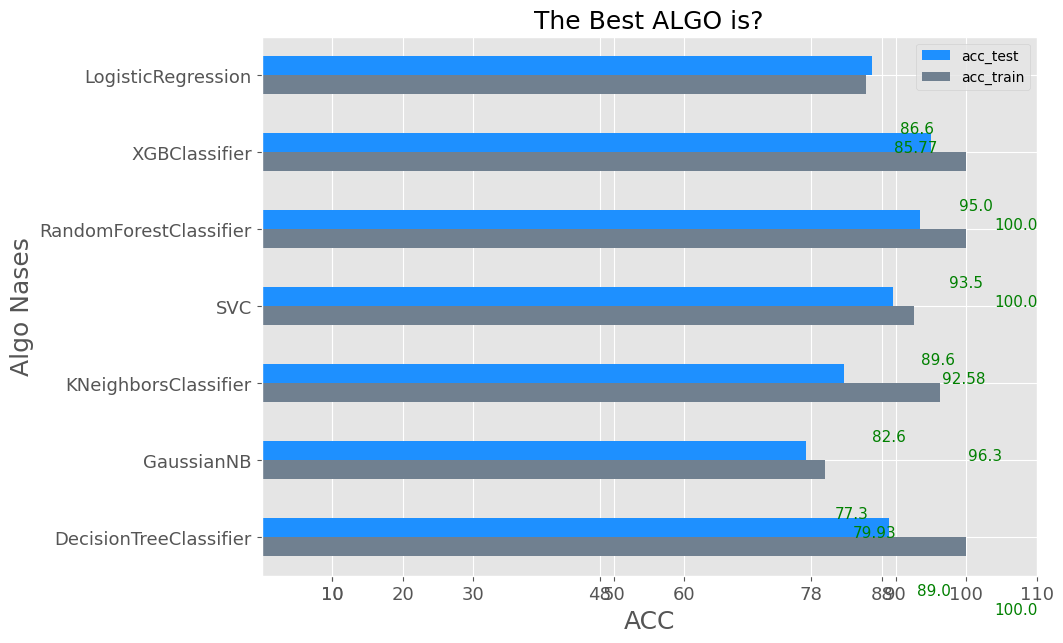

In [36]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
# set jupyter's max row display
pd.set_option("display.max_row", 100)
# set jupyter's max column width to 50
pd.set_option("display.max_columns", 56)
#Load the dataset
ax = df_results[['acc_test', 'acc_train']].plot (kind = "barh", figsize=(10,7), color=["dodgerblue", "slategray"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("The Best ALGO is?",
fontsize=18)
ax.set_xlabel("ACC", fontsize=18)
ax.set_ylabel("Algo Nases", fontsize=18)
ax.set_xticks([10,10,20,30,48,50,60,78,88,90,100,110])
ax.set_yticklabels(df_results.iloc[:,0].values.tolist())
# set individual bar tables using above list
for i in ax.patches:
    #get width pulls left or right; get y pushes up or down
    ax.text(i.get_width()+4, i.get_y()+1, \
    str(round((i.get_width()), 2)), fontsize=11, color = "green")
# invert for largest on top
ax.invert_yaxis()

([<matplotlib.axis.YTick at 0x207d8ab6070>,
 [Text(0, 0, 'state'),
  Text(0, 1, 'account length'),
  Text(0, 2, 'area code'),
  Text(0, 3, 'international plan'),
  Text(0, 4, 'voice mail plan'),
  Text(0, 5, 'number vmail messages'),
  Text(0, 6, 'total day minutes'),
  Text(0, 7, 'total day calls'),
  Text(0, 8, 'total day charge'),
  Text(0, 9, 'total eve minutes'),
  Text(0, 10, 'total eve calls'),
  Text(0, 11, 'total eve charge'),
  Text(0, 12, 'total night minutes'),
  Text(0, 13, 'total night calls'),
  Text(0, 14, 'total night charge'),
  Text(0, 15, 'total intl minutes'),
  Text(0, 16, 'total intl calls'),
  Text(0, 17, 'total intl charge'),
  Text(0, 18, 'customer service calls')])

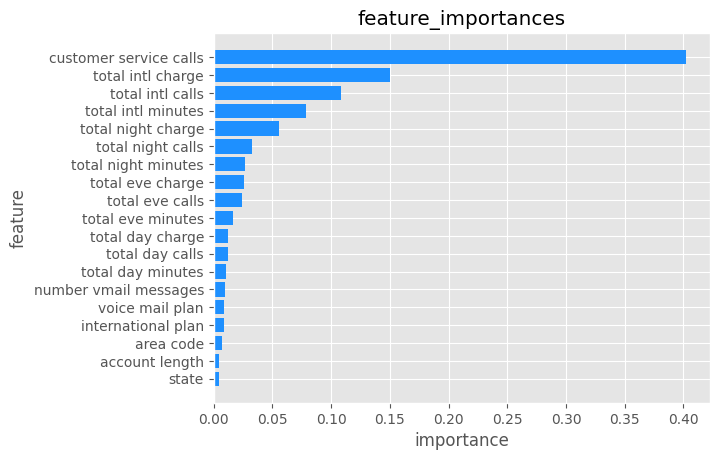

In [37]:
feature_importance=gbc.feature_importances_
feat_importances = pd.Series(feature_importance, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(19)
feature= df.columns.values.tolist()[0:-1]
importance = sorted (gbc.feature_importances_.tolist())
x_pos = [i for i, _ in enumerate(feature)]
plt.barh(x_pos, importance, color="dodgerblue")
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")
plt.yticks(x_pos, feature)

# 

# 

# 

# 

# 

# 

# Création de l'ensemble du pipeline d'apprentissage automatique avec PyCaret Deploiement avec FastAPI

**Ce didacticiel couvre l'ensemble du processus ML, depuis l'ingestion des données, le prétraitement, la formation du modèle, l'ajustement des hyperparamètres, la prédiction et le stockage du modèle pour une utilisation ultérieure.**

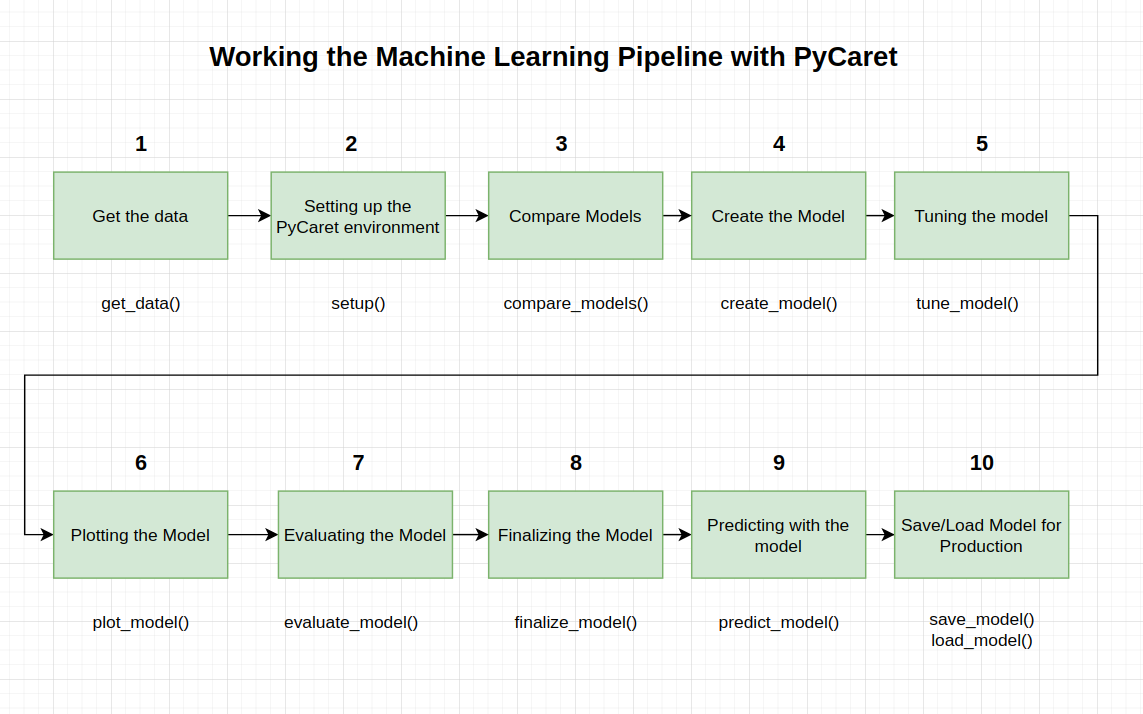

## 👉 Installation de PyCaret 

In [38]:
# !pip install pycaret

## 👉 Installation de FastAPI 

In [39]:
# !pip install fastapi

## 👉 Installation de Uvicorn 

In [40]:
# !pip install uvicorn

In [41]:
# !pip install streamlit

## 👉Chargement du jeu de données 

In [10]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


##  Analyse exploratoire des données 

In [14]:
# plot scatter carat_weight et Price
import plotly.express as px 
fig = px.scatter(x=df['total_day_calls'], y=df['churn'], 
                 facet_col = df['voice_mail_plan'], opacity = 0.25, template = 'plotly_dark', trendline='ols', 
                 trendline_color_override = 'red', title = ' UNE ÉTUDE DE CAS') 
fig.show()

In [12]:
# tracer l'histogramme
fig = px.histogram(df, x=["churn"], template = 'plotly_dark', title = 'Histogram of churn') 
fig.show()

In [13]:
import numpy as np
# create a copy of data
data_copy = df.copy()
# create a new feature Log_Price
data_copy['Log_churn'] = np.log(df['churn'])
# plot histogram
fig = px.histogram(data_copy, x=["Log_churn"], title = 'Histgram of Log Price')
fig.show()

C:\Users\HP\anaconda3_last_version_02_2023\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



## 👉 Préparation des données 

## 👉 Setting up the PyCaret environment 

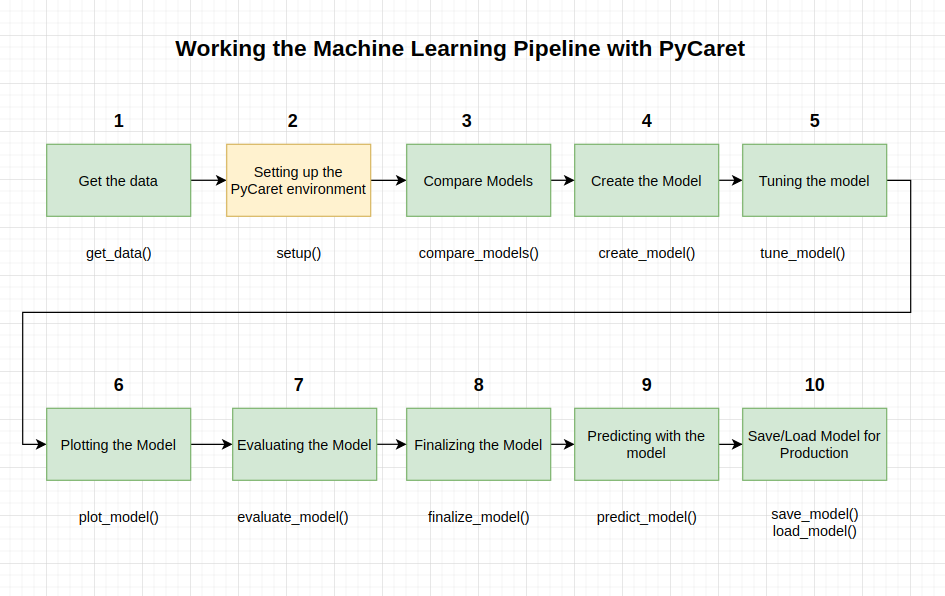

In [170]:
# ma version actuelle de scikit-learn : 1.2.1

# !pip install --user scikit-learn==0.23.2

In [171]:
# # init setup
# from pycaret.classification import *
# s = setup(df, target = "churn",session_id=123)



# init setup
from pycaret.classification import *
s = setup(df, target = "churn",session_id=123, categorical_features=["state","area_code", "international_plan", "voice_mail_plan", "customer_service_calls"] )


,Description,Value
0,session_id,123
1,Target,churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3333, 20)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


## 👉 Compare Models 

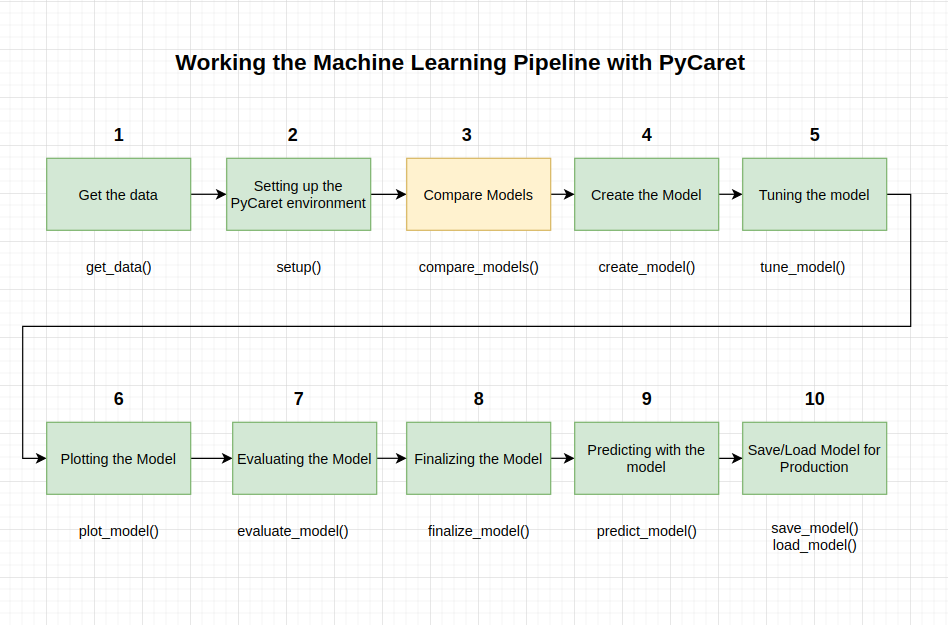

In [172]:
# compare all models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9417,0.9020,0.6815,0.9074,0.7748,0.7424,0.7544,0.4210
gbc,Gradient Boosting Classifier,0.9391,0.9116,0.6901,0.8753,0.7693,0.7350,0.7433,0.3810
lightgbm,Light Gradient Boosting Machine,0.9383,0.9054,0.6589,0.9042,0.7595,0.7253,0.7389,0.4080
rf,Random Forest Classifier,0.9083,0.8965,0.4295,0.9184,0.5778,0.5349,0.5868,0.2870
dt,Decision Tree Classifier,0.8898,0.7958,0.6617,0.6274,0.6420,0.5772,0.5788,0.0300
et,Extra Trees Classifier,0.8817,0.8834,0.2924,0.8025,0.4197,0.3705,0.4314,0.2410
ada,Ada Boost Classifier,0.8744,0.8328,0.3750,0.6326,0.4673,0.4023,0.4215,0.1410
knn,K Neighbors Classifier,0.8671,0.6474,0.2720,0.6452,0.3792,0.3182,0.3573,0.0580
dummy,Dummy Classifier,0.8504,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130
lr,Logistic Regression,0.8487,0.8261,0.2089,0.4864,0.2881,0.2198,0.2458,2.2640


In [173]:
print(best_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


## Create the Model 

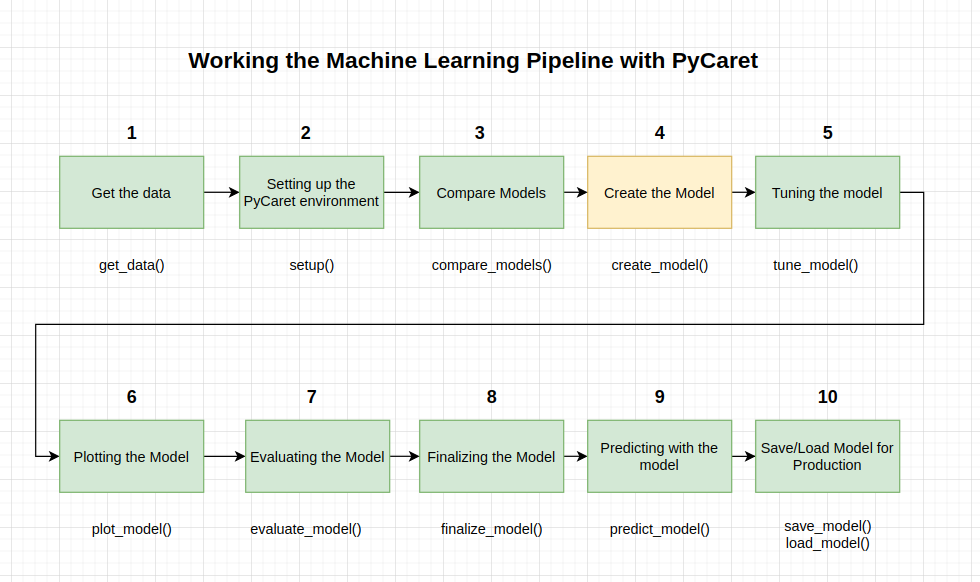

In [174]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [177]:
xgboost_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9530,0.9419,0.6857,1.0000,0.8136,0.7877,0.8061
1,0.9487,0.9002,0.7714,0.8710,0.8182,0.7885,0.7904
2,0.9530,0.9907,0.7143,0.9615,0.8197,0.7933,0.8049
3,0.9270,0.8630,0.5294,0.9474,0.6792,0.6418,0.6764
4,0.9356,0.9212,0.6571,0.8846,0.7541,0.7180,0.7285
5,0.9227,0.8169,0.6000,0.8400,0.7000,0.6571,0.6693
6,0.9485,0.9036,0.7429,0.8966,0.8125,0.7830,0.7876
7,0.9528,0.8506,0.7429,0.9286,0.8254,0.7985,0.8051
8,0.9227,0.8981,0.5714,0.8696,0.6897,0.6477,0.6663


In [178]:
print(xgboost_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


## Tunning the Model 

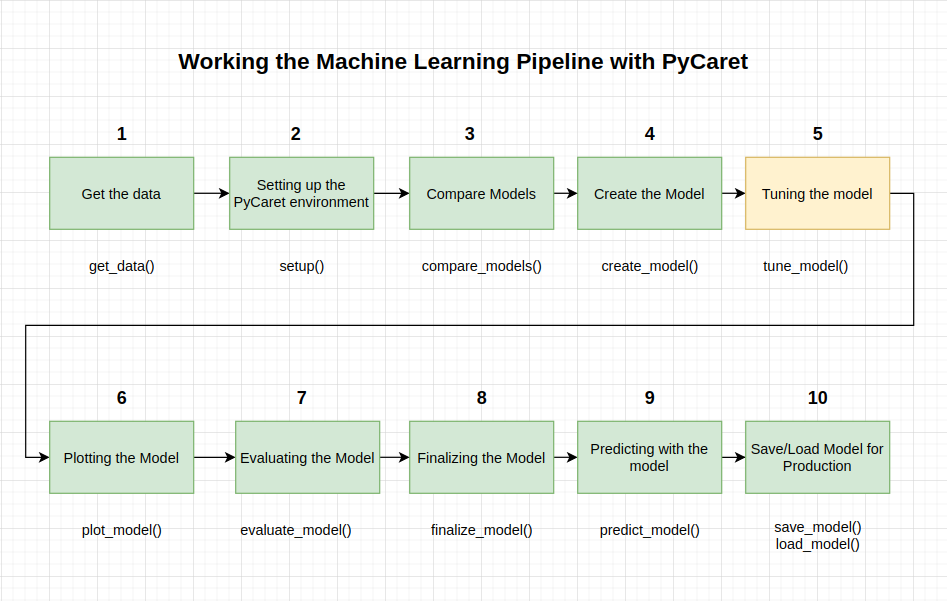

In [179]:
tuned_xgboost_model = tune_model(xgboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,0.9575,0.8286,0.9062,0.8657,0.8433,0.8444
1,0.9444,0.8569,0.7714,0.8438,0.8060,0.7736,0.7747
2,0.9444,0.9798,0.7429,0.8667,0.8000,0.7680,0.7710
3,0.9356,0.8695,0.6176,0.9130,0.7368,0.7017,0.7191
4,0.9442,0.8960,0.6857,0.9231,0.7869,0.7556,0.7666
5,0.9099,0.8927,0.6286,0.7333,0.6769,0.6249,0.6274
6,0.9356,0.9174,0.7714,0.7941,0.7826,0.7448,0.7449
7,0.9442,0.8900,0.7714,0.8438,0.8060,0.7735,0.7745
8,0.9270,0.8926,0.6286,0.8462,0.7213,0.6804,0.6903


In [180]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_xgboost_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


## Plotting the Model 

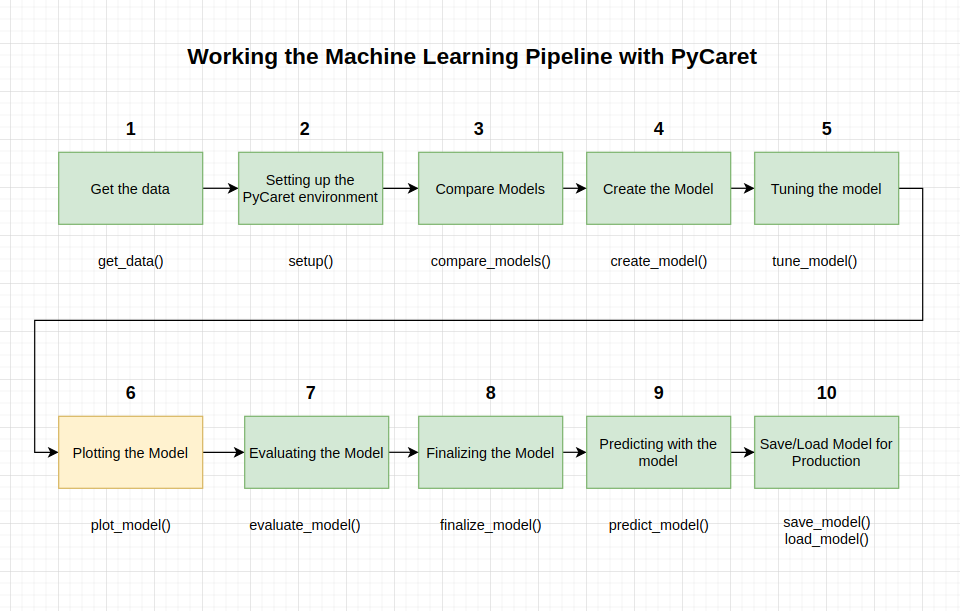

In [ ]:
## AUC Plot

plot_model(tuned_lr, plot = 'auc')

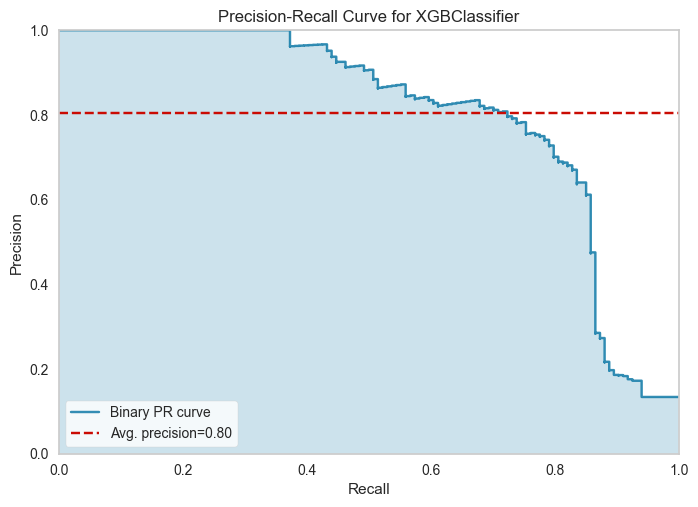

In [181]:
## Precision-recall curve

plot_model(tuned_xgboost_model, plot = 'pr')

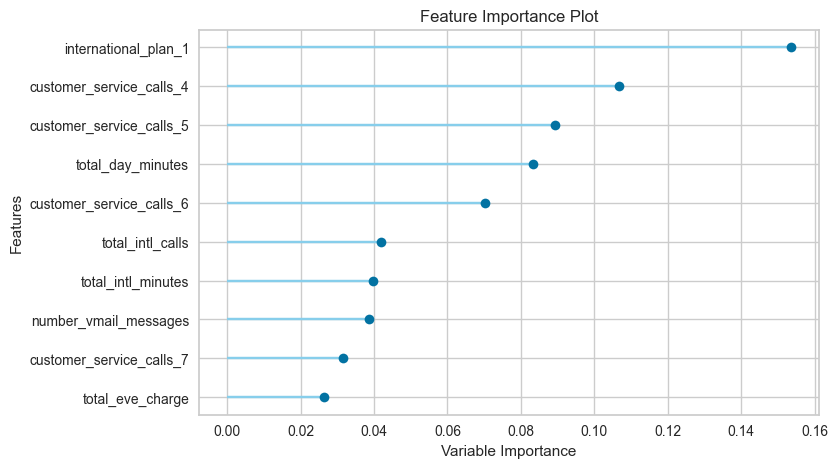

In [182]:
# check feature importance
# plot_model(best_model, plot = 'feature')
plot_model(tuned_xgboost_model, plot = 'feature')

## Evaluation the model 

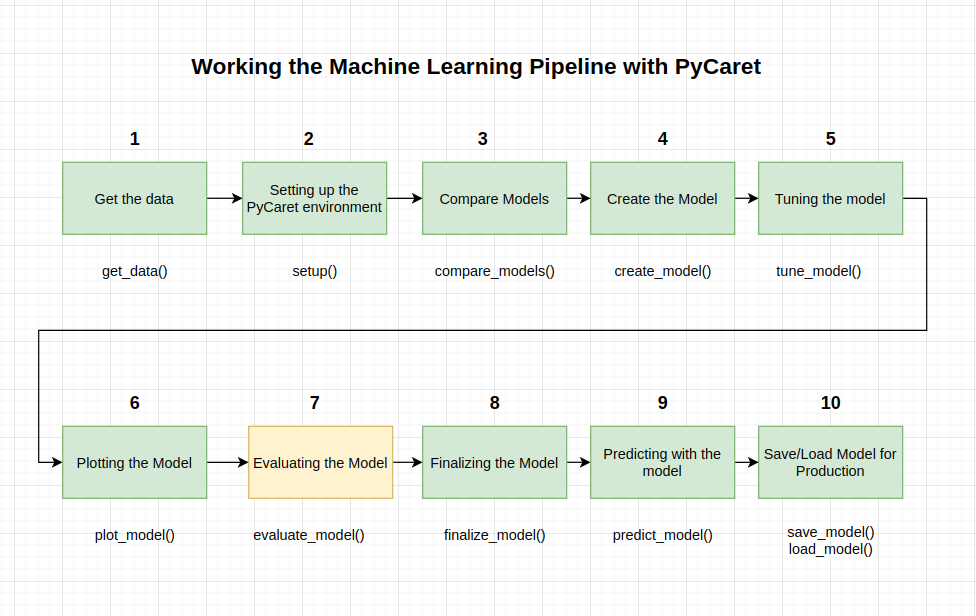

In [183]:
evaluate_model(tuned_xgboost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizing the Model

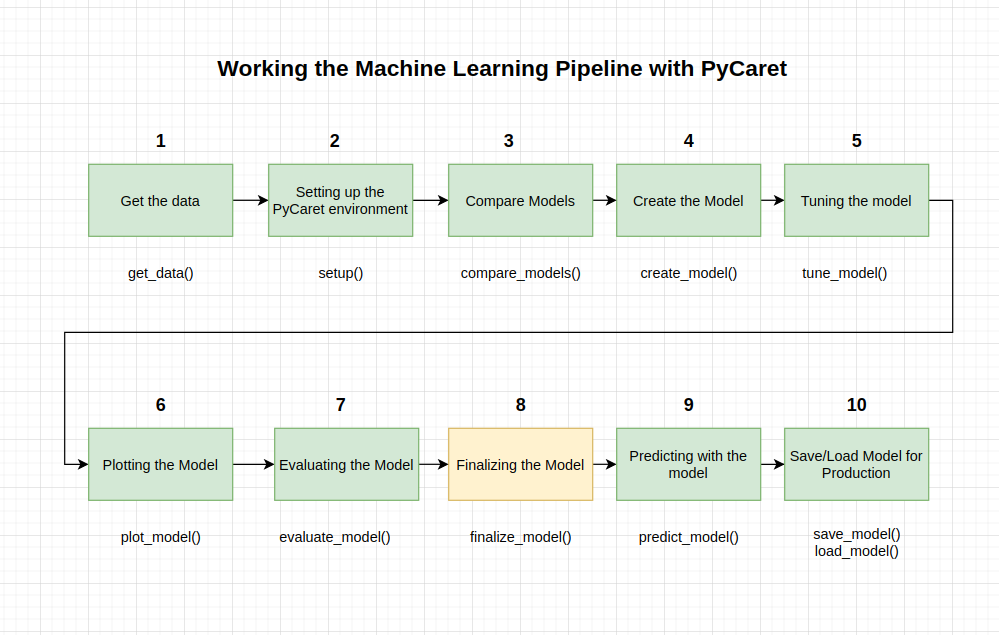

In [185]:
final_tuned_xgboost_model = finalize_model(tuned_xgboost_model)

#the parameters

print(final_tuned_xgboost_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


## Prediction with the model

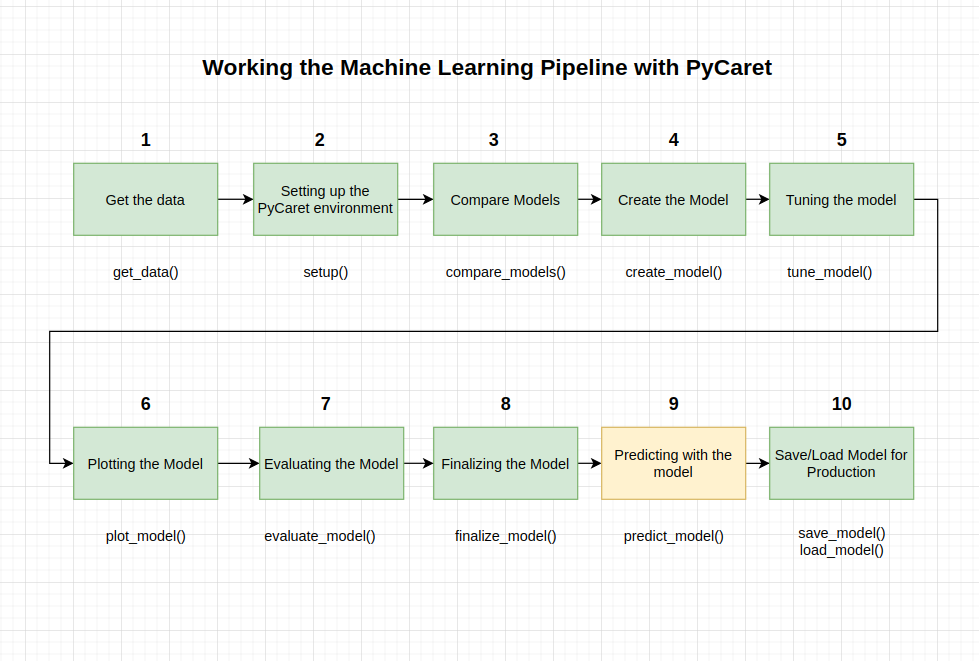

In [186]:
# from joblib import load
from pycaret.classification import load_model, predict_model

In [187]:
cols = ['state', 'account_length', 'area_code','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge', 'customer_service_calls']

records = [[16,12,5,0,1,25,26.1,10,5.07,7.4,9,1.78,2.7,9,11.01,10.0,3,2.7,1]]

data = pd.DataFrame(data = records, columns=cols)

# predict_model(model, data)
predict_model(estimator= final_tuned_xgboost_model, data = data)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Label,Score
0,16,12,5,0,1,25,26.1,10,5.07,7.4,...,1.78,2.7,9,11.01,10.0,3,2.7,1,0,0.5609


## Save/Load Model for Production 

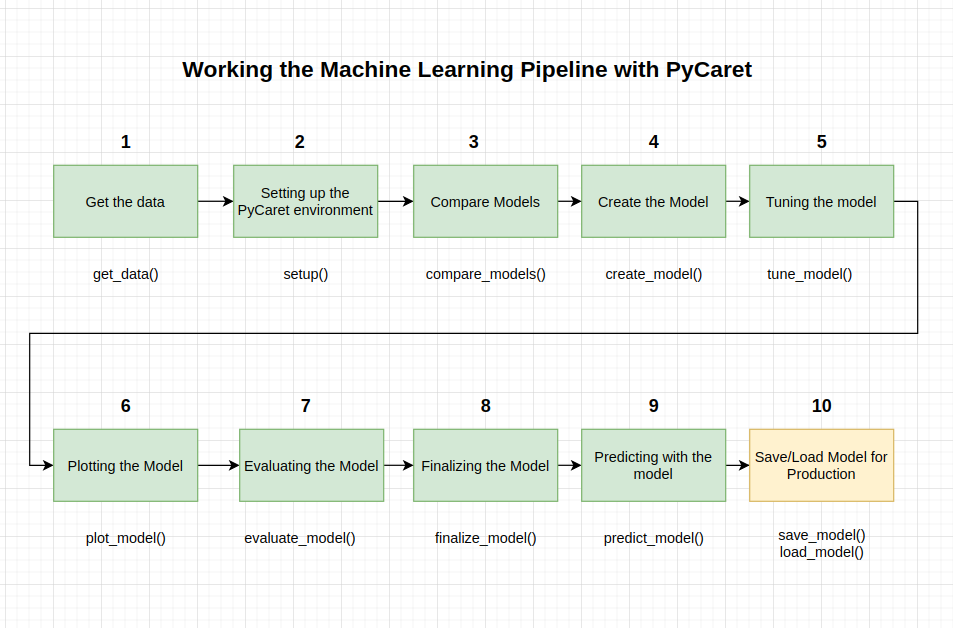

In [189]:
# save model to disk
model = save_model(final_tuned_xgboost_model,'ChurnModel')

Transformation Pipeline and Model Successfully Saved


# 

## .........................

In [ ]:
# df

In [ ]:
# # plot scatter carat_weight et Price
# import plotly.express as px 
# fig = px.scatter(x=df['total_day_calls'], y=df['churn'], 
#                  facet_col = df['voice_mail_plan'], opacity = 0.25, template = 'plotly_dark', trendline='ols', 
#                  trendline_color_override = 'red', title = 'SARAH OBTIENT UN DIAMANT - UNE ÉTUDE DE CAS') 
# fig.show()



In [ ]:
# # tracer l'histogramme
# fig = px.histogram(df, x=["churn"], template = 'plotly_dark', title = 'Histogram of churn') 
# fig.show()



In [ ]:
# import numpy as np
# # create a copy of data
# data_copy = df.copy()
# # create a new feature Log_Price
# data_copy['Log_churn'] = np.log(df['churn'])
# # plot histogram
# fig = px.histogram(data_copy, x=["Log_churn"], title = 'Histgram of Log Price')
# fig.show()



In [ ]:
# ## 👉 Préparation des données 

# # ma version actuelle de scikit-learn : 1.2.1

# # !pip install --user scikit-learn==0.23.2

# # # init setup
# # from pycaret.classification import *
# # s = setup(df, target = "churn",session_id=123)

# # init setup
# from pycaret.classification import *
# s = setup(df, target = "churn",session_id=123, categorical_features=["state","area_code", "international_plan", "voice_mail_plan", "customer_service_calls"])



In [ ]:
# ## 👉 Formation et sélection de modèles 

# # compare all models
# best = compare_models()

# best



In [ ]:
# create_api(best, 'essaie')

# !python essaie.py

# check feature importance
# plot_model(best, plot = 'feature')



In [ ]:
## Finaliser et enregistrer le pipeline 

# from joblib import dump
# # # finaliser le modèle
# final_best = finalize_model(best)
# # enregistrer le modèle sur le disque
# dump(final_best, 'churnModel.joblib')



# finalize the model
# final_best = finalize_model(best)
# save model to disk
# save_model(final_best, 'aaaa')



In [ ]:
# ## PREDICTION

# from joblib import load
# from pycaret.classification import load_model, predict_model

# #. Load trained Pipeline
# model = load_model('aaaa')
# # model = load('churnModel.joblib')

# cols = ['state', 'account_length', 'area_code','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# records = [[16,12,5,0,1,25,26.1,10,5.07,7.4,9,1.78,2.7,9,11.01,10.0,3,2.7,1]]

# data = pd.DataFrame(data = records, columns=cols)

# # predict_model(model, data)
# predict_model(estimator= model, data = data)

In [ ]:
# import asyncio
# # 1. Library imports
# import pandas as pd
# from joblib import load
# from pycaret.classification import load_model, predict_model
# from fastapi import FastAPI
# import uvicorn
# import pickle

# # 2. Create the app object
# app = FastAPI()

# #. Load trained Pipeline
# model = load_model('aaaa')
# # model = load('josue.joblib')

# # @app.get('/get_root')
# # def get_root():
# #     return {'message': 'Welcome to the sentiment analysis API'}


# # Define predict function
# @app.post('/predict')
# def predict(state, account_length, area_code, international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,	total_eve_calls,total_eve_charge,total_night_minutes, total_night_calls, total_night_charge,total_intl_minutes,	total_intl_calls, total_intl_charge, customer_service_calls):
#     data = pd.DataFrame([[state, account_length, area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,	total_eve_calls,total_eve_charge,total_night_minutes, total_night_calls, total_night_charge,total_intl_minutes,	total_intl_calls, total_intl_charge, customer_service_calls]])
#     data.columns = ['state', 'account_length', 'area_code','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes',	'total_eve_calls','total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge', 'customer_service_calls']

#     predictions = predict_model(estimator=model, data=data)
#     return {'prediction': int(predictions['Label'][0])}
# #     return predictions


# # import requests
# # def get_predictions(state, account_length, area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,	total_eve_calls,total_eve_charge,total_night_minutes, total_night_calls, total_night_charge,total_intl_minutes,	total_intl_calls, total_intl_charge, customer_service_calls):
# #     url = 'http://127.0.0.1:8000/predict?state= {state}&account_length= {account_length}&area_code= {area_code}&international_plan= {international_plan}&voice_mail_plan= {voice_mail_plan}&number_vmail_messages={number_vmail_messages}&total_day_minutes={total_day_minutes}&total_day_calls={total_day_calls}&total_day_charge={total_day_charge}&total_eve_minutes={total_eve_minutes}&total_eve_calls={total_eve_calls}&total_eve_charge={total_eve_charge}&total_night_minutes={total_night_minutes}&total_night_calls={total_night_calls}&total_night_charge={total_night_charge}&total_intl_minutes={total_intl_minutes}&total_intl_calls={total_intl_calls}&total_intl_charge={total_intl_charge}&customer_service_calls={customer_service_calls}' \
# #         .format(state=state, account_length=account_length, area_code=area_code,international_plan=international_plan,voice_mail_plan=voice_mail_plan,number_vmail_messages=number_vmail_messages,total_day_minutes=total_day_minutes,total_day_calls=total_day_calls,total_day_charge=total_day_charge,total_eve_minutes=total_eve_minutes,	total_eve_calls=total_eve_calls,total_eve_charge=total_eve_charge,total_night_minutes=total_night_minutes, total_night_calls=total_night_calls, total_night_charge=total_night_charge,total_intl_minutes=total_intl_minutes,	total_intl_calls=total_intl_calls, total_intl_charge=total_intl_charge, customer_service_calls=customer_service_calls)
# #     # url = 'http://127.0.0.1:8000/predict?state= {state}&account_length= {account_length}&area_code= {area_code}&international_plan= {international_plan}&voice_mail_plan= {voice_mail_plan}&number_vmail_messages={number_vmail_messages}&total_day_minutes={total_day_minutes}&total_day_calls={total_day_calls}&total_day_charge={total_day_charge}&total_eve_minutes={total_eve_minutes}&total_eve_calls={total_eve_calls}&total_eve_charge={total_eve_charge}&total_night_minutes={total_night_minutes}&total_night_calls={total_night_calls}&total_night_charge={total_night_charge}&total_intl_minutes={total_intl_minutes}&total_intl_calls={total_intl_calls}&total_intl_charge={total_intl_charge}&customer_service_calls={customer_service_calls}' \
# #     x = requests.post(url)
# #     print(x.text)


# if __name__ == '__projet__':
#     uvicorn.run(app, host='127.0.0.1', port=8000)